# <font color="#DE1509">Test of Means</font>

The mean difference, or difference in means, measures the absolute difference between the mean value in two different groups or the mean of one sample group to a predefined value.

In [5]:
%pip install scikit_posthocs

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp

Suppose we have exam scores of 10 students and the mean is ~ 52.  

In [7]:
scores = np.array([40, 45, 45, 70, 57, 69, 50, 45, 47, 56])
np.mean(scores)

np.float64(52.4)

Can we confidently report that the mean is 52?  
Or can we confidently report that the mean is larger than 50?

&nbsp;   
## <font color="#127C02">*t*-Test</font>
A type of inferential statistic used to determine if there is a *significant* difference between the means of two groups of the mean of one sample group to a predefined value.  
  
The t-test owes its name to William Sealy Gosset, who, in 1908, published his paper on the t-test under the pseudonym "Student". Gosset worked at the famous Guinness Brewery in Dublin, Ireland, and devised the t-test as an economical way to monitor the quality of beer.

\
<font color="#029DA3">**Type of t-test**</font>
- One-sample t-test  
  Check if the mean of a population is equal to some predefined hypothesized value.
- Two-sample t-test  
  Check if the difference between the means of two populations is equal to some pre-determined value, when the two samples have been chosen independently of each other. In particular, you can use this test to check whether the two groups are different from one another.
    - equal variance
    - unequal variance
- Paired t-test  
  Investigate the change in the mean of a population before and after some experimental intervention, based on a paired sample, i.e., when each subject has been measured twice: before and after treatment. In particular, you can use this test to check whether, on average, the treatment has had any effect on the population.

&nbsp;   
#### <font color="#127C02">*One-sample t-test*</font>  
check if the mean of a population is equal to some predefined hypothesized value.  
For example, we have simulated sample rvs1 and would like to check whether the mean is 0 or not.

In [8]:
#simulate sample with mean=0 n=100
rvs1 = stats.norm.rvs(loc=0, scale=2, size=100, random_state=1234) # loc is mean of sample,  rvs = random variates
print("first 10 values of rvs1:\n", rvs1[1:10])
print("rvs1 mean:", np.mean(rvs1))
print("rvs1 std:", np.std(rvs1))

first 10 values of rvs1:
 [-2.38195139  2.86541394 -0.62530379 -1.44117747  1.77432588  1.71917683
 -1.27304701  0.03139274 -4.48536991]
rvs1 mean: 0.07022456625087302
rvs1 std: 1.991369700670806


\
Test that mean of rvs1 is really 0 as define by loc in the statement:  
rvs1 = stats.norm.rvs(loc=0, scale=2, size=100, random_state=rng)

\
***Hypothesis:***  
Null hypothesis(H<sub>0</sub>): mean of rvs1 is equal to 0  
Alternative hypothesis(H<sub>A</sub>): mean of rvs1 is ***not*** equal to 0

In [9]:
t_score, p_value = stats.ttest_1samp(rvs1,
                                     popmean=0,
                                     alternative='two-sided') #'two-sided', 'less', 'greater'
print("t_score:",t_score)
print("p-value:",p_value)

t_score: 0.35087689228345265
p-value: 0.7264262605275482


\
***p-value interpretation***  
p-value >= 0.05, accept H<sub>0</sub> (fail to reject H<sub>0</sub>) reject H<sub>A</sub>  
~~p-value < 0.05, reject H<sub>0</sub> accept H<sub>A</sub>~~

see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

\
<font color="#C70039">**What is t-score & p-value?**</font>

&nbsp;   
#### <font color="#029DA3">**t-score**</font>
For one-sample t-test, t-score can be calculated as follows:

![t-one-sample](https://uploads-cdn.omnicalculator.com/images/ttest1.svg?width=425&enlarge=0&format=webp)

μ₀ is the mean postulated in H₀ (in this case 0);  
n is sample size;  
x̄ is the sample mean; and  
s is sample standard deviation;  
dof is degree of freedom = n-1,

\
We can manually calculate t-score using above equation.

In [10]:
xbar = np.mean(rvs1)
s = np.std(rvs1, ddof=1) #degree of freedom (dof) = n-1. So, ddof = 1

In [11]:
t_stat_manual = xbar/s*np.sqrt(len(rvs1))
t_stat_manual

np.float64(0.35087689228345265)

This t-score will be used in p-value caculation.

In [12]:
t_crit_right = stats.t.isf(0.05/2, df=rvs1.size-1)
t_crit_right

np.float64(1.9842169515086832)

In [13]:
t_crit_left = stats.t.ppf(0.05/2, df=rvs1.size-1)
t_crit_left

np.float64(-1.9842169515086832)

&nbsp;   
#### <font color="#029DA3">**p-value**</font>
p-value is the probability calculated under the assumption that the null hypothesis (H₀) is true. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05.    
In other words, a p-value is the probability that the results from your sample data occurred by chance. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of 0.01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.
  
As probabilities correspond to areas under the density function, p-value from t-test can be nicely illustrated with the help of the following pictures:

![tailed-p-value](https://uploads-cdn.omnicalculator.com/images/pval_t.png?width=425&enlarge=0&format=webp)

For left-tailed t-test:  
<font color="#C70039">**p-value = cdf(abs(t_score), dof)**</font>  
  
For right-tailed t-test:  
<font color="#C70039">**p-value = 1-cdf(abs(t_score), dof)**</font>  
  
\*For two-tailed t-test:  
<font color="#C70039">**p-value = 2\*cdf(-abs(t_score), dof)**</font>  
  
\*Commonly used in most tests (test for equality).

\
In this example, we use two-tailed t-test (test that mean = 0).

In [14]:
dof = len(rvs1)-1
p_value_manual = 2*(stats.t.cdf(-abs(t_stat_manual), dof))
p_value_manual

np.float64(0.7264262605275482)

&nbsp;   
#### <font color="#127C02">*Two-sample t-test*</font>

Check if the difference between the means of two populations is equal to some pre-determined value (usually 0), when the two samples have been chosen independently of each other.  
In particular, you can use this test to check whether the two groups are different from one another.   

\
Create random number generator:

***Note that rvs1 and rvs2 have equal variances (since std is equal, both=2)***

\
Simulate sample rvs1 with mean=0 std=2 n=100:

In [15]:
rvs1 = stats.norm.rvs(loc=0, scale=2, size=100, random_state=1234)
print("rvs1 mean:", np.mean(rvs1))
print("rvs1 std:", np.std(rvs1))
print("rvs1 var:", np.var(rvs1))

rvs1 mean: 0.07022456625087302
rvs1 std: 1.991369700670806
rvs1 var: 3.9655532847497357


\
Simulate sample rvs2 with mean=1 std=2 n=100:

In [16]:
rvs2 = stats.norm.rvs(loc=1, scale=2, size=100, random_state=1234)
print("rvs2 mean:", np.mean(rvs2))
print("rvs2 std:",np.std(rvs2))
print("rvs2 var:", np.var(rvs2))

rvs2 mean: 1.0702245662508731
rvs2 std: 1.991369700670806
rvs2 var: 3.9655532847497357


\
Display histograms:

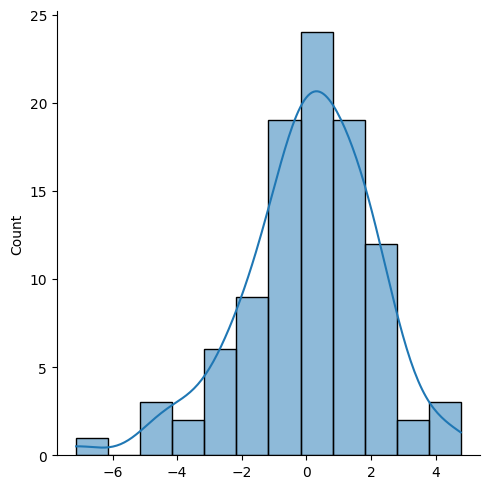

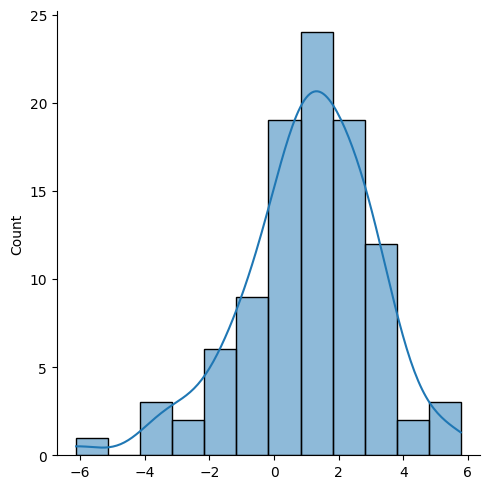

In [17]:
sns.displot(rvs1, kde=True)
sns.displot(rvs2, kde=True)

\
For ease of comparison, we can plot both histograms in the same graph.  
First, we need to create a dataframe containning both data.

In [18]:
df_rvs = pd.DataFrame({
    'value':
        np.append(rvs1, rvs2),
    'group':
        np.append(np.repeat("rvs1", len(rvs1)), np.repeat("rvs2", len(rvs2)))
})
df_rvs.head()

,value,group
0,0.942870,rvs1
1,-2.381951,rvs1
2,2.865414,rvs1
3,-0.625304,rvs1
4,-1.441177,rvs1


In [19]:
df_rvs.tail()

,value,group
195,0.836106,rvs2
196,0.310468,rvs2
197,2.056576,rvs2
198,-1.137978,rvs2
199,-0.023763,rvs2


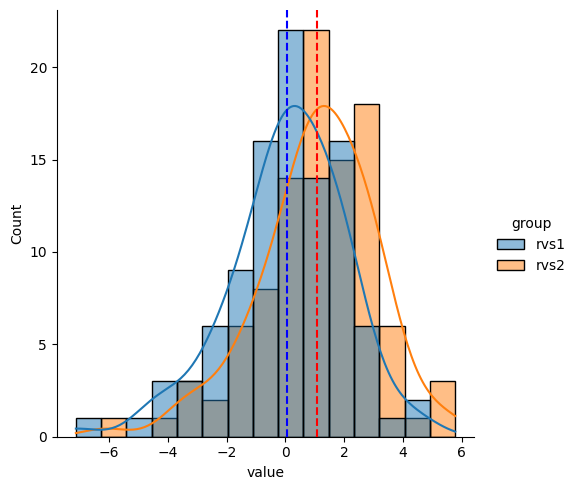

In [20]:
sns.displot(data=df_rvs, x='value', hue='group', kde=True)
plt.axvline(x=np.mean(rvs1), c='b', ls='--') #vline = vertical line
plt.axvline(x=np.mean(rvs2), c='r', ls='--')

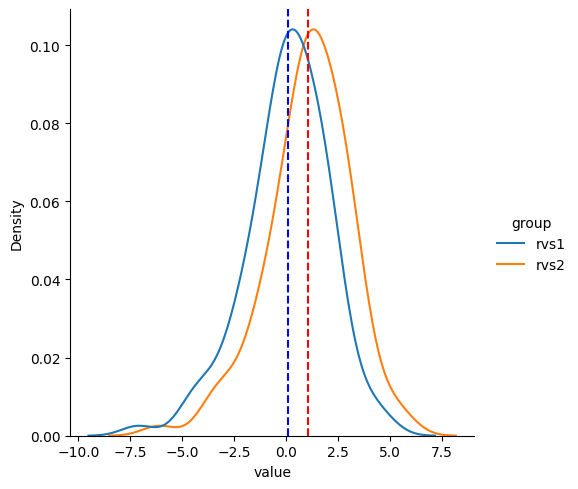

In [21]:
sns.displot(data=df_rvs, x='value', hue='group', kind='kde')
plt.axvline(x=np.mean(rvs1), c='b', ls='--')
plt.axvline(x=np.mean(rvs2), c='r', ls='--')

&nbsp;   
#### Performing two-sample t-test using ttest_ind():

***Hypothesis***  
H<sub>0</sub>: the actual difference between rvs1 and rvs2 means is equal to 0  
H<sub>A</sub>: the actual difference between rvs1 and rvs2 means is ***not*** equal to 0

**\*Note that rvs1 and rvs2 have equal variances (both std=2)**

In [22]:
t_score, p_value = stats.ttest_ind(a=rvs1,
                                   b=rvs2,
                                   equal_var=True, # rvs1 and rvs2 have equal variances (both std=2)
                                   alternative='two-sided')
print("t-score:", t_score)
print("p-value:", p_value)

t-score: -3.5330574917179614
p-value: 0.000511175976131963


\
***p-value interpretation***  
~~p-value > 0.05, accept H<sub>0</sub> reject H<sub>A</sub>~~  
p-value < 0.05, reject H<sub>0</sub> accept H<sub>A</sub>

&nbsp;   
#### <font color="#029DA3">**t-score & p-value**<span>
For two-sample t-test, the t-score is a ratio between the difference between two groups and the difference within the groups. The larger the t-score, the more difference there is between groups. The smaller the t-score, the more similarity there is between groups. A t-score of 3 means that the groups are three times as different from each other as they are within each other. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.

- A large t-score tells you that the groups are different.
- A small t-score tells you that the groups are similar.

 t score can be calculated as:

ttest11.svg

Δ is the mean difference postulated in H₀;  
n₁ is the first sample size;  
x̄₁ is the mean for the first sample;  
s₁ is the standard deviation in the first sample;  
n₂ is the second sample size;  
x̄₂ is the mean for the second sample;  
s₂ is the standard deviation in the second sample.

sₚ is pooled standard deviation

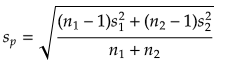

From equations above, we can manually calculate t-score and p-value as follow:  
(we assume that rvs1 and rvs2 are draw from populations with equal variances. If we calculate variances of sample rvs1 and rvs2, we found that they are approximately equal).

In [23]:
print("rvs1 var:", np.var(rvs1, ddof=1))
print("rvs2 var:", np.var(rvs2, ddof=1))

rvs1 var: 4.005609378535087
rvs2 var: 4.005609378535087


In [24]:
xbar1 = np.mean(rvs1) #the mean for the first sample
xbar2 = np.mean(rvs2) #the mean for the second sample
delta = 0 # the mean difference postulated in H0

In [25]:
sp = np.sqrt((((len(rvs1)-1)*(np.std(rvs1, ddof=1)**2)) + ((len(rvs2)-1)*(np.std(rvs2, ddof=1)**2))) / (len(rvs1)+len(rvs2)-2))
sp

np.float64(2.001401853335578)

In [26]:
t_stat_manual = (xbar1-xbar2) / (sp*np.sqrt(2/len(rvs1)))
t_stat_manual

np.float64(-3.5330574917179614)

\
For two-sided t-test,  
<font color="#C70039">**p-value = 2\*(t.cdf(-abs(t_score), dof))**</font>  
where cdf is a cumulative distribution function (complicated formula)  
Degree of freedom (dof) = n₁ + n₂ - 2

In [27]:
#Degree of freedom for two-sample t-test
dof = len(rvs1) + len(rvs2) -  2
dof

198

In [28]:
p_value_manual = 2*(stats.t.cdf(-abs(t_stat_manual), dof))
p_value_manual

np.float64(0.000511175976131963)

&nbsp;   
#### <font color="#029DA3">***Effect of sample size n***</font>

Suppose we simulate a sample rvs3 with a small number of n.  
This rvs3 has very small mean difference to rvs 1.

In [29]:
rvs1 = stats.norm.rvs(loc=0, scale=2, size=100, random_state=1234)
print("rvs1 mean:", np.mean(rvs1))
print("rvs1 std:", np.std(rvs1))
print("rvs1 var:", np.var(rvs1))

rvs1 mean: 0.07022456625087302
rvs1 std: 1.991369700670806
rvs1 var: 3.9655532847497357


In [30]:
rvs3 = stats.norm.rvs(loc=0.1, scale=2, size=100, random_state=1234)

In [31]:
t_stat, p_value = stats.ttest_ind(rvs1, rvs3)
print("t-stat:",t_stat)
print("p-value",p_value)

t-stat: -0.3533057491717964
p-value 0.7242351084484739


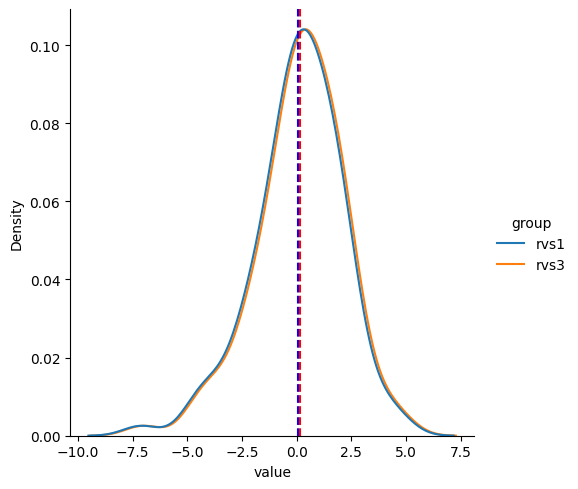

In [32]:
df_rvs = pd.DataFrame({
    'value':
        np.append(rvs1, rvs3),
    'group':
        np.append(np.repeat("rvs1", len(rvs1)), np.repeat("rvs3", len(rvs3)))
})
sns.displot(data=df_rvs, x='value', hue='group', kind='kde')
plt.axvline(x=np.mean(rvs1), c='b', ls='--')
plt.axvline(x=np.mean(rvs3), c='r', ls='--')

However, when n is large, this small differnce can be very significant.

In [33]:
rvs1 = stats.norm.rvs(loc=0, scale=2, size=100000, random_state=1234)
rvs3 = stats.norm.rvs(loc=0.1, scale=2, size=100000, random_state=1234)

t_stat, p_val = stats.ttest_ind(rvs1, rvs3)
print("t-score:", t_stat)
print("p-value:", p_val)

t-score: -11.172925444291977
p-value: 5.643348388981928e-29


&nbsp;   
#### <font color="#127C02">*Two-sample t-test if variances are unequal (Welch's t-test)*</font>

The two-sample t-test described above is used when both samples have equal variances.  
In the case of unequal variances, the equation for calculating t-score need to be changed.

In [34]:
rvs1 = stats.norm.rvs(loc=0, scale=1, size=100, random_state=1234)
print("mean rvs1:", np.mean(rvs1))
print("variance rvs1:",np.var(rvs1))

mean rvs1: 0.03511228312543651
variance rvs1: 0.9913883211874339


In [35]:
rvs2 = stats.norm.rvs(loc=1, scale=2.5, size=100, random_state=1234)
print("mean rvs2:", np.mean(rvs2))
print("variance rvs2:",np.var(rvs2))

mean rvs2: 1.0877807078135913
variance rvs2: 6.1961770074214595


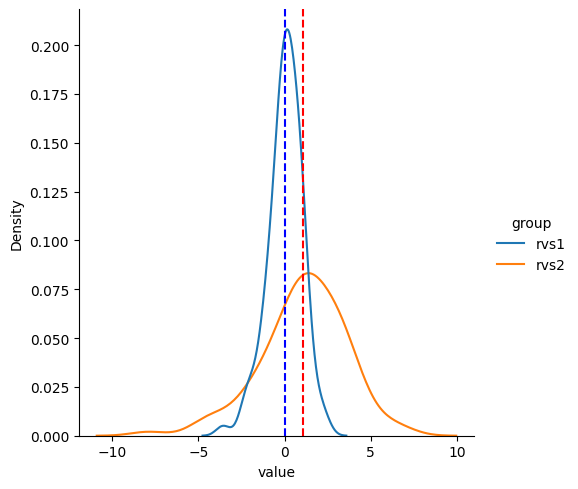

In [36]:
df_rvs = pd.DataFrame({
    'value':
        np.append(rvs1, rvs2),
    'group':
        np.append(np.repeat("rvs1", len(rvs1)), np.repeat("rvs2", len(rvs2)))
})
sns.displot(data=df_rvs, x='value', hue='group', kind='kde')
plt.axvline(x=np.mean(rvs1), c='b', ls='--')
plt.axvline(x=np.mean(rvs2), c='r', ls='--')

***Hypothesis***  
H<sub>0</sub>: the actual difference between rvs1 and rvs2 means is equal to 0  
H<sub>A</sub>: the actual difference between rvs1 and rvs2 means is ***not*** equal to 0

**Perform two-sample t-test**  
Notice that equal_var=False

In [37]:
t_stat, p_val = stats.ttest_ind(a=rvs1,
                                b=rvs2,
                                equal_var=False, #unequal variance
                                alternative='two-sided')
print("t-stat:", t_stat)
print("p-val:", p_val)

t-stat: -3.9067740201197005
p-val: 0.00014971440728743147


p-value < 0.05, reject H<sub>0</sub> accept H<sub>A</sub>

 In case of unequal variances, t-score can be calculated as:

![t-score](https://uploads-cdn.omnicalculator.com/images/ttest10.svg)

From this equation, we can manually calculate t-score as follows:

In [38]:
xbar1 = np.mean(rvs1)
xbar2 = np.mean(rvs2)

t_stat_manual = (xbar1-xbar2) / np.sqrt( np.var(rvs1, ddof=1)/len(rvs1) +  np.var(rvs2, ddof=1)/len(rvs2))
#Note that np.var = np.std()**2

t_stat_manual

np.float64(-3.9067740201197005)

Degrees of freedom (dof) in a Welch's t-test can be calculated using the equation:

![dof-unequal-var](https://uploads-cdn.omnicalculator.com/images/ttest5.svg?width=425&enlarge=0&format=webp)

In [39]:
dof = ((np.var(rvs1, ddof=1)/len(rvs1) + np.var(rvs2, ddof=1)/len(rvs2))**2) / ( ((np.var(rvs1, ddof=1)/len(rvs1))**2)/(len(rvs1)-1)  +
                                                                                ((np.var(rvs2, ddof=1)/len(rvs2))**2)/(len(rvs2)-1) )
dof

np.float64(129.8892355694228)

We then use t-score and dof to calculate p-value:

In [40]:
p_value_manual = 2*(stats.t.cdf(-abs(t_stat_manual), dof))
p_value_manual

np.float64(0.00014971440728743147)

&nbsp;   
#### <font color="#127C02">*Paired t-test*</font>

Investigate the change in the mean of a population before and after some experimental intervention, based on a paired sample, i.e., when each subject has been measured twice: before and after treatment.

Suppose "rvs1_before" and "rvs1_after" are groups of patients before and after retrieving a specific treatment, respectively.

In [41]:
rvs1_before = stats.norm.rvs(loc=0, scale=1, size=100, random_state=1234)
print("mean rvs1-before:", np.mean(rvs1_before))
print("variance rvs1-before:",np.var(rvs1_before))

mean rvs1-before: 0.03511228312543651
variance rvs1-before: 0.9913883211874339


In [42]:
rvs1_after = stats.norm.rvs(loc=1, scale=1, size=100, random_state=1234)
print("mean rvs1-after:", np.mean(rvs1_after))
print("variance rvs1-after:",np.var(rvs1_after))

mean rvs1-after: 1.0351122831254365
variance rvs1-after: 0.9913883211874339


\
***Hypothesis***  
H<sub>0</sub>: the actual difference between rvs1-before and rvs1-after means is equal to 0  
H<sub>A</sub>: the actual difference between rvs1-before and rvs1-after means is ***not*** equal to 0

Since sample rvs1_before is RELATED to rvs1-after, we need to use ttest_rel() instead of ttest_ind().

In [43]:
t_stat, p_val = stats.ttest_rel(a=rvs1_before,
                                b=rvs1_after,
                                alternative='two-sided')
print("t-stat:", t_stat)
print("p-val:", p_val)

t-stat: -1.4170245413405918e+17
p-val: 0.0


c:\Users\Asus\anaconda3\envs\pstat13\Lib\site-packages\scipy\stats\_axis_nan_policy.py:423: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


p-value < 0.05, reject H<sub>0</sub> accept H<sub>A</sub>

 In case of paired t-test, t-score can be calculated as:

![t-score-paired](https://uploads-cdn.omnicalculator.com/images/ttest9.svg?width=425&enlarge=0&format=webp)

Δ is mean difference postulated in H₀ (in this case = 0)  
n is the size of the sample of differences, i.e., the number of pairs;  
x̄ is the mean of the sample of differences; and  
s is the standard deviation of the sample of differences  
dof = n-1, so ddof=1

In [44]:
xbar = np.mean(rvs1_before - rvs1_after)
s = np.std(rvs1_before - rvs1_after, ddof=1)
t_stat_manual = xbar/s * np.sqrt(len(rvs1))
t_stat_manual

np.float64(-1.4170245413405922e+17)

We can calculate p-value using the same equation for two-tailed test.

In [45]:
dof = len(rvs1_before) - 1

In [46]:
p_value_manual = 2*(stats.t.cdf(-abs(t_stat_manual), dof))
p_value_manual

np.float64(0.0)

---

&nbsp;   
#### <font color="#127C02">*Non-parametric test*</font>
Note that t-test can be applied with <u>normal distributed samples</u> only.  
For non-normal distributed samples, test of means can be conducted using non-parametric tests such as Mann–Whitney U test.

All samples in examples above are normal distributed since the stats.norm is used.

H<sub>0</sub>: sample is normal distributed  
H<sub>A</sub>: sample is not normal distributed

In [47]:
from scipy.stats import shapiro

rvs1 = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=1234)
rvs2 = stats.norm.rvs(loc=1, scale=1, size=1000, random_state=1234)
rvs3 = stats.norm.rvs(loc=0.1, scale=1, size=1000, random_state=1234)

print("For rvs1:", shapiro(rvs1))
print("For rvs2:", shapiro(rvs2))
print("For rvs3:", shapiro(rvs3))

For rvs1: ShapiroResult(statistic=np.float64(0.9985032779424902), pvalue=np.float64(0.5567761266483351))
For rvs2: ShapiroResult(statistic=np.float64(0.9985032779424898), pvalue=np.float64(0.5567761266480963))
For rvs3: ShapiroResult(statistic=np.float64(0.9985032779424902), pvalue=np.float64(0.5567761266483351))


Every p-values > 0.05, accept H<sub>0</sub>

\
Now, we generate new samples, rvs4 and rvs5, with non-normal distribution.

mean rvs4: 1.2434705966807464
std rvs4 3.7623033913001427


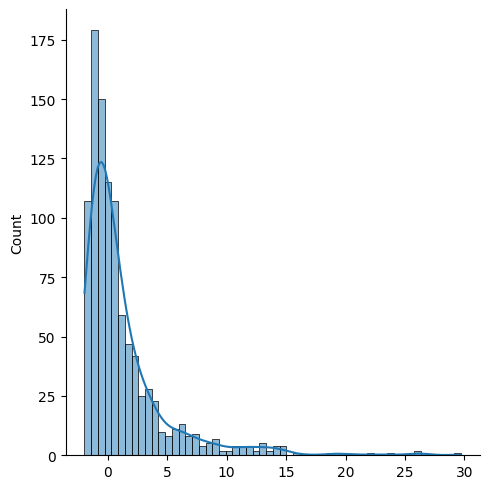

In [48]:
rvs4 = stats.lognorm.rvs(s=1, loc=-2, scale=2, size=1000, random_state=1234)
print("mean rvs4:", np.mean(rvs4))
print("std rvs4", np.std(rvs4))
sns.displot(rvs4, kde=True)

In [49]:
print("Shapiro rvs4:", shapiro(rvs4))

Shapiro rvs4: ShapiroResult(statistic=np.float64(0.6742272651574059), pvalue=np.float64(5.173527879722718e-40))


p-value is < 0.05, so non-normal distributed.

mean rvs5: 1.489055280421277
std rvs5: 4.259744420385393
Shapiro rvs5: ShapiroResult(statistic=np.float64(0.6494023220403704), pvalue=np.float64(4.561628463651522e-41))


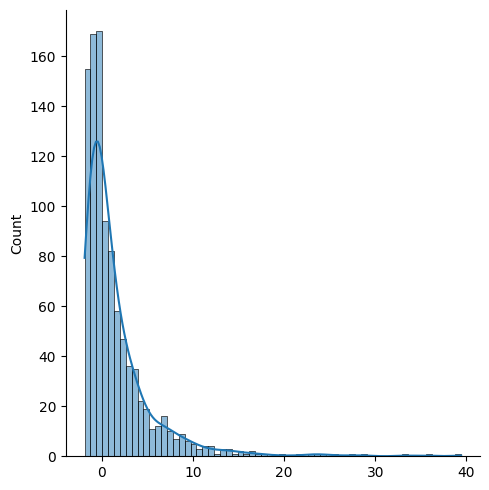

In [50]:
rvs5 = stats.lognorm.rvs(s=1, loc=-2, scale=2, size=1000, random_state=4321)
print("mean rvs5:", np.mean(rvs5))
print("std rvs5:", np.std(rvs5))
print("Shapiro rvs5:", shapiro(rvs5))
sns.displot(rvs5, kde=True)

### <font color="#029DA3">**Mean comparison using non-parametric test (Mann–Whitney U test)**</font>

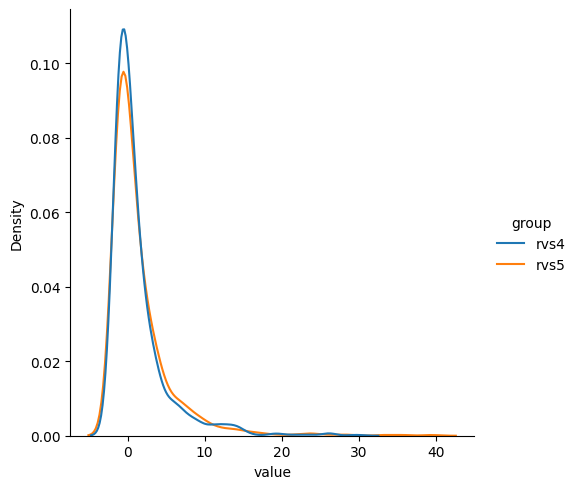

In [51]:
df_rvs = pd.DataFrame({
    'value':
        np.append(rvs4, rvs5),
    'group':
        np.append(np.repeat("rvs4", len(rvs4)), np.repeat("rvs5", len(rvs5)))
})
sns.displot(data=df_rvs, x='value', hue='group', kind='kde')

***Hypothesis***  
H<sub>0</sub>: the actual difference between rvs4 and rvs5 means is equal to 0  
H<sub>A</sub>: the actual difference between rvs4 and rvs5 means is ***not*** equal to 0

In [52]:
u_score, p_value = stats.mannwhitneyu(rvs4, rvs5)
print("u-score:", u_score)
print("p-value", p_value)

u-score: 488403.0
p-value 0.3691660658645034


p-value > 0.05, fail to reject H<sub>0</sub>

\
Let's simulate another non-nomal distribution sample rvs6.

mean rvs6: 2.243470596680747
std rvs6 3.7623033913001427
Shapiro rvs6: ShapiroResult(statistic=np.float64(0.6742272651574059), pvalue=np.float64(5.173527879722718e-40))


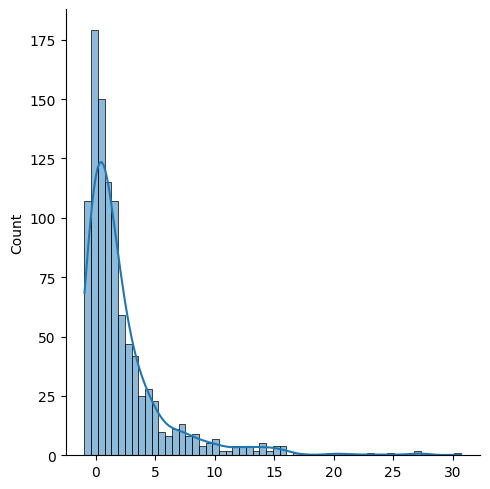

In [53]:
rvs6 = stats.lognorm.rvs(s=1, loc=-1, scale=2, size=1000, random_state=1234)
print("mean rvs6:", np.mean(rvs6))
print("std rvs6", np.std(rvs6))
print("Shapiro rvs6:", shapiro(rvs6))
sns.displot(rvs6, kde=True)

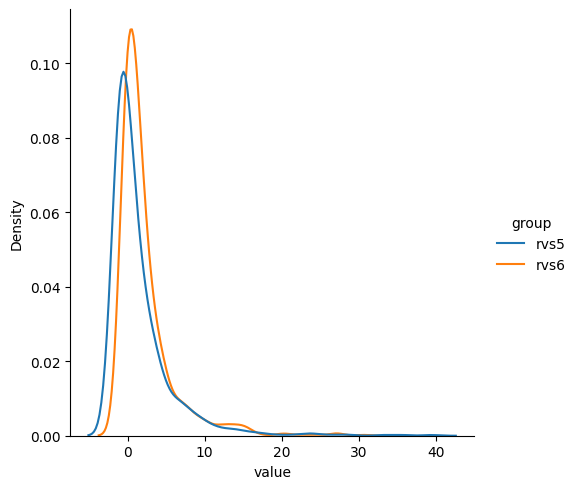

In [54]:
df_rvs = pd.DataFrame({
    'value':
        np.append(rvs5, rvs6),

    'group':
        np.append(np.repeat("rvs5", len(rvs5)), np.repeat("rvs6", len(rvs6)))
})
sns.displot(data=df_rvs, x='value', hue='group', kind='kde')

In [55]:
u_score, p_value = stats.mannwhitneyu(rvs5, rvs6)
print("u-score:", u_score)
print("p-value", p_value)

u-score: 359069.0
p-value 9.91358074457915e-28


p-value < 0.05, means of rvs5 and rvs6 are different.

---

&nbsp;   
#### <font color="#127C02">Using t-test with a real dataset
  
  
In this example we will use poisons.csv which has 3 columns
  
- poison: type of poison (1, 2, or 3)  
- treatment: type of treatment (A, B, C, or D)  
- time: time until an animal death (hours)  

In [56]:
df_poison = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/poisons.csv")
df_poison.head()

,poison,treat,time
0,1,A,0.31
1,1,A,0.45
2,1,A,0.46
3,1,A,0.43
4,2,A,0.36


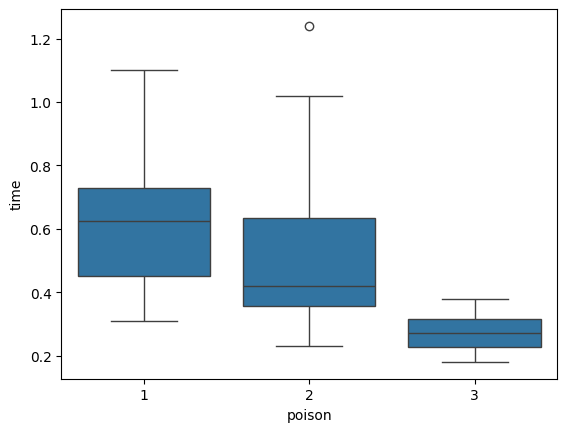

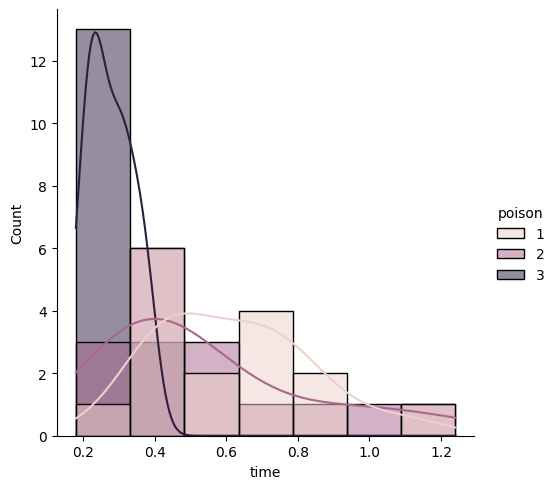

In [57]:
sns.boxplot(data=df_poison, x='poison', y='time')
sns.displot(data=df_poison, x='time', hue='poison', kde=True)

Notice that mean of poison 1 is quite different from poison 3 from the box plot.

\
Check normality of values that will be used in t-test

In [58]:
from scipy.stats import shapiro

print(shapiro(df_poison.query('poison==1').time))
print(shapiro(df_poison.query('poison==2').time))
print(shapiro(df_poison.query('poison==3').time))

ShapiroResult(statistic=np.float64(0.9323534257986114), pvalue=np.float64(0.2655801886939463))
ShapiroResult(statistic=np.float64(0.8525377100882588), pvalue=np.float64(0.014850776011361363))
ShapiroResult(statistic=np.float64(0.9359594629191632), pvalue=np.float64(0.302428102732507))


Normal distributed: time data of poison 1 and 3  
Non-normal distributed: poison 2

\
Perform t-test using time data of poison 1 and 3:

In [59]:
t_score, p_value = stats.ttest_ind(df_poison.query('poison==1').time,
                                  df_poison.query('poison==3').time)
print("t-score:", t_score)
print("p-value:", p_value)

t-score: 6.247395854499549
p-value: 6.997340898860745e-07


p-values < 0.05, means of poison 1 and 3 are different.

\
Non-parametric test for poison 1 & 2 and 2 & 3:

In [60]:
t_score, p_value = stats.mannwhitneyu(df_poison.query('poison==1').time,
                                      df_poison.query('poison==2').time)
print("t-score:", t_score)
print("p-value:", p_value)

t-score: 170.0
p-value: 0.117527101345443


In [61]:
t_score, p_value = stats.mannwhitneyu(df_poison.query('poison==2').time,
                                      df_poison.query('poison==3').time)
print("t-score:", t_score)
print("p-value:", p_value)

t-score: 227.0
p-value: 0.0002023164156903696


---

&nbsp;   
#### <font color="#127C02">*One-way Anova*</font>  
For a comparison of more than two group means, the one-way analysis of variance (ANOVA) is the appropriate method instead of the t-test.

\
Let's create three simulated samples:

In [62]:
rvs1 = stats.norm.rvs(loc=0, scale=2, size=100, random_state=1234)
rvs2 = stats.norm.rvs(loc=0, scale=2, size=100, random_state=4321)
rvs3 = stats.norm.rvs(loc=0.1, scale=2, size=100, random_state=1234)

Perform one-way anova using stats.f_oneway()

H<sub>0</sub>: there is no difference in the means of rvs1, rvs2, and rvs3  
H<sub>A</sub>: there is difference in the means of rvs1, rvs2, and rvs3 (can be either rvs1 vs. rvs2 / rvs1 vs. rvs3 / rvs2 vs. rvs3)

In [63]:
f_score, p_value = stats.f_oneway(rvs1, rvs2, rvs3)
print("F-score:", f_score)
print("p-value:", p_value)

F-score: 0.5318767198592652
p-value: 0.5880598873924324


p-value > 0.05, no difference in means of rvs1, rvs2, and rvs3.

\
Let's try simulating samples again:

In [64]:
rvs1 = stats.norm.rvs(loc=0, scale=2, size=100, random_state=1234)
rvs2 = stats.norm.rvs(loc=3, scale=2, size=100, random_state=1234)
rvs3 = stats.norm.rvs(loc=0, scale=2, size=100, random_state=1111)

In [65]:
f_score, p_value = stats.f_oneway(rvs1, rvs2, rvs3)
print("F-score:", f_score)
print("p-value:", p_value)

F-score: 85.64049001804672
p-value: 4.306403431035485e-30


p-value < 0.05, there is difference in the means of rvs1, rvs2, and rvs3  
*But, what is different?*

###  
#### <font color="#029DA3">**Post Hoc Test**</font>
To find which pair of means are different, we need to perform post hoc test.

In [66]:
import scikit_posthocs as sp

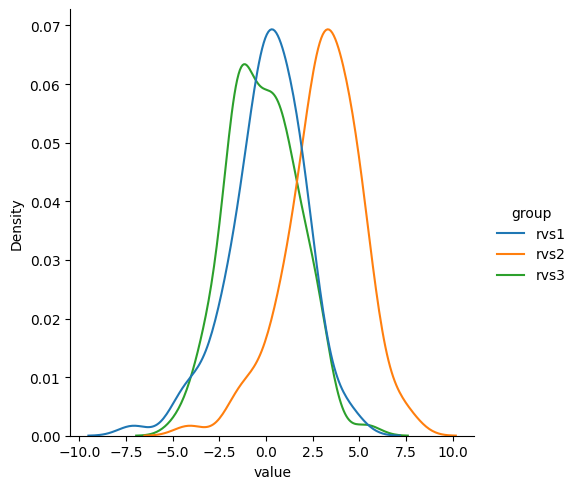

In [67]:
df_rvs = pd.DataFrame({
    'value':
        np.append(np.append(rvs1, rvs2), rvs3),
    'group':
        np.append(
            np.append(np.repeat("rvs1",
                                len(rvs1)), np.repeat("rvs2", len(rvs2))),
            np.repeat("rvs3", len(rvs3)))
})
sns.displot(data=df_rvs, x='value', hue='group', kind='kde')

In [68]:
df_rvs

,value,group
0,0.942870,rvs1
1,-2.381951,rvs1
2,2.865414,rvs1
3,-0.625304,rvs1
4,-1.441177,rvs1
...,...,...
295,-1.659869,rvs3
296,0.397266,rvs3
297,-2.274499,rvs3
298,1.769222,rvs3


In [69]:
sp.posthoc_ttest(df_rvs, val_col='value', group_col='group')

,rvs1,rvs2,rvs3
rvs1,1.000000e+00,4.441566e-21,3.511520e-01
rvs2,4.441566e-21,1.000000e+00,5.247869e-25
rvs3,3.511520e-01,5.247869e-25,1.000000e+00


Post hoc test is basically parwise t-test.  
Here, values shown in the table are p-values from t-tests.
  
We can see that means of rvs1 and rvs2 &  rvs2 and rvs3 are significantly different.

\
However, one-way ANOVA is also a parametric test that required samples to be <u>normal-distributed</u>.  
https://scikit-posthocs.readthedocs.io/en/latest/tutorial/

&nbsp;   
#### <font color="#127C02">*Kruskal–Wallis one-way analysis*</font>
For a comparison of more than two group means with non-normal distribution, the Kruskal–Wallis test is the appropriate method instead of the one-way ANOVA.

Let's create three simulated samples with non-normal distribution.

In [70]:
rvs4 = stats.lognorm.rvs(s=1, loc=-3, scale=2, size=100, random_state=1234)
rvs5 = stats.lognorm.rvs(s=1, loc=-3, scale=2, size=100, random_state=4321)
rvs6 = stats.lognorm.rvs(s=1, loc=-1, scale=2, size=100, random_state=1234)

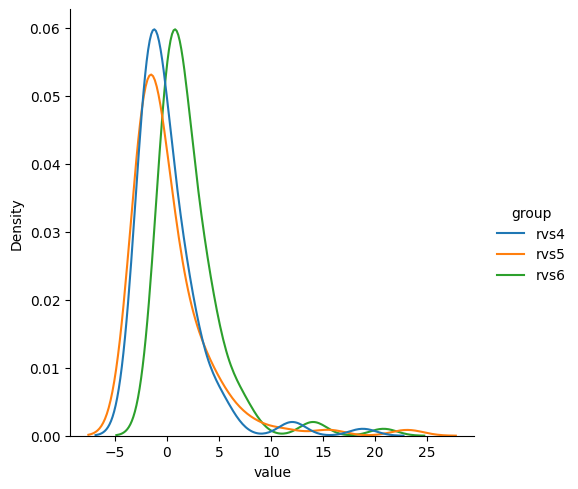

In [71]:
df_rvs = pd.DataFrame({
    'value':
        np.append(np.append(rvs4, rvs5), rvs6),
    'group':
        np.append(
            np.append(np.repeat("rvs4",
                                len(rvs4)), np.repeat("rvs5", len(rvs5))),
            np.repeat("rvs6", len(rvs6)))
})
sns.displot(data=df_rvs, x='value', hue='group', kind='kde')

Perform Kruskal–Wallis test using stats.kruskal()

H<sub>0</sub>: there is no difference in the means of rvs1, rvs2, and rvs3  
H<sub>A</sub>: there is difference in the means of rvs1, rvs2, and rvs3 (can be either rvs1 vs. rvs2 / rvs1 vs. rvs3 / rvs2 vs. rvs3)

In [72]:
f_score, p_value = stats.kruskal(rvs4, rvs5, rvs6)
print("F-score:", f_score)
print("p-value:", p_value)

F-score: 54.95107242524921
p-value: 1.1682242996069508e-12


p-value < 0.05,there is difference in the means of rvs4, rvs5, and rvs6

To perform pos hoc test for non-parametric, we use posthoc_conover()

In [73]:
sp.posthoc_conover(df_rvs, val_col='value', group_col='group')

,rvs4,rvs5,rvs6
rvs4,1.000000e+00,5.449232e-01,7.328329e-11
rvs5,5.449232e-01,1.000000e+00,1.750218e-12
rvs6,7.328329e-11,1.750218e-12,1.000000e+00


&nbsp;   
#### With poison dataset:

Now, we will compare means from all 3 poisons.

In [74]:
f_score, p_value = stats.kruskal(df_poison.query('poison==1').time,
                                 df_poison.query('poison==2').time,
                                 df_poison.query('poison==3').time)
print("F-score:", f_score)
print("p-value:", p_value)

F-score: 25.584373641599644
p-value: 2.7824274695091738e-06


In [75]:
sp.posthoc_conover(df_poison, val_col='time', group_col='poison')

,1,2,3
1,1.000000e+00,0.053028,7.105057e-09
2,5.302759e-02,1.000000,6.190577e-06
3,7.105057e-09,0.000006,1.000000e+00
